## CO543 - Image Processing - Lab 04
#### E/20/280
#### Pathirage R.S.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [59]:
# Load data
train_data = pd.read_csv('digit_recognizer/train.csv')
test_data = pd.read_csv('digit_recognizer/test.csv')

## 1. Using K-means algorithm Identify the different clusters of MNIST

### The Elbow Method for Finding Optimal K

The elbow method is used to determine the optimal number of clusters (K) in K-means clustering. It involves the following steps:

1. Run the K-means algorithm for a range of K values (e.g., from 1 to 10).
2. For each K, calculate the distortion (sum of squared distances from each point to its assigned cluster center).
3. Plot the distortion values against the number of clusters (K).
4. Identify the "elbow point" in the plot, where the distortion starts to decrease more slowly. This point indicates the optimal K.

The distortion for a given K is calculated as follows:

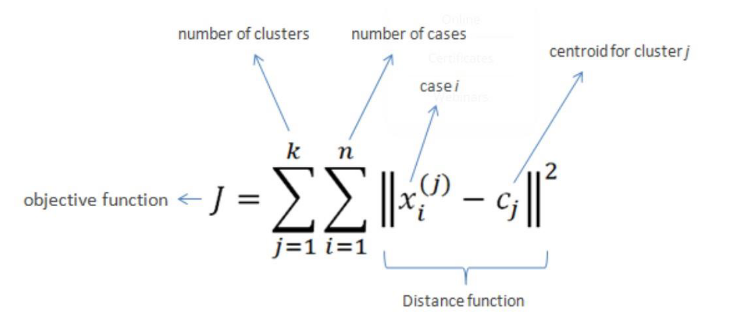

The elbow point is where the plot of distortion vs. K shows a noticeable bend, indicating that increasing K further does not significantly reduce the distortion.

In [ ]:
# Normalize and reshape data
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test = test_data.values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Normalize and Reshape Data

1. **Extract Features and Labels:**
    - `X_train = train_data.drop('label', axis=1).values`: This line removes the 'label' column from the training data and converts the remaining data into a NumPy array. The resulting `X_train` contains only the pixel values of the images.
    - `y_train = train_data['label'].values`: This line extracts the 'label' column from the training data and converts it into a NumPy array. The resulting `y_train` contains the labels (digits) corresponding to each image in the training data.
    - `X_test = test_data.values`: This line converts the test data into a NumPy array. The resulting `X_test` contains the pixel values of the images in the test data.

2. **Normalize Data:**
    - `scaler = StandardScaler()`: This line creates an instance of the `StandardScaler` class from the `sklearn.preprocessing` module. The `StandardScaler` standardizes features by removing the mean and scaling to unit variance.
    - `X_train_scaled = scaler.fit_transform(X_train)`: This line fits the `StandardScaler` to the training data and then transforms it. The resulting `X_train_scaled` contains the normalized pixel values of the training images.
    - `X_test_scaled = scaler.transform(X_test)`: This line transforms the test data using the same `StandardScaler` fitted to the training data. The resulting `X_test_scaled` contains the normalized pixel values of the test images.

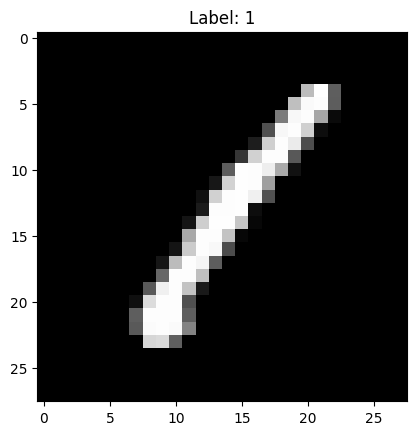

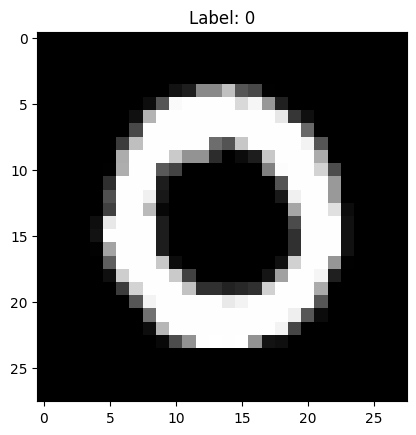

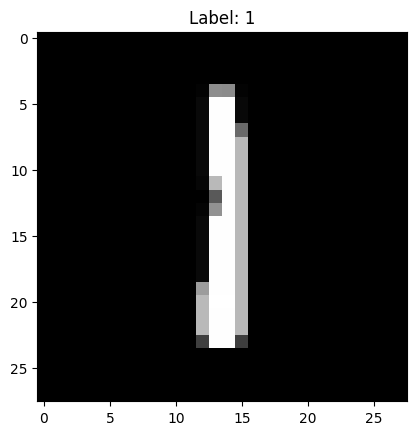

In [ ]:
# Show some data examples
def show_examples(data, labels, num_examples=3):
    for i in range(num_examples):
        plt.imshow(data[i].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.show()

show_examples(X_train, y_train)

As visible above, data are labeled accordingly.

In [ ]:
# Elbow method to identify optimal K value
def elbow_method(data):
    distortions = []
    K = range(5, 15)
    for k in K:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    plt.figure(figsize=(8, 4))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    optimal_k = distortions.index(min(distortions)) + 1
    return optimal_k

## a.
### Elbow Method to Identify Optimal K Value

The elbow method is a technique used to determine the optimal number of clusters (K) in a K-means clustering algorithm. The method involves the following steps:

1. **Initialize Variables:**
    - `distortions = []`: An empty list to store the distortion values for each K.
    - `K = range(5, 15)`: A range of K values to test, from 5 to 14.

2. **Run K-means for Each K:**
    - For each value of K in the specified range, the K-means algorithm is run with `n_clusters=k`.
    - `kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)`: Initializes the K-means algorithm with the specified number of clusters and a random state for reproducibility.
    - `kmeans.fit(data)`: Fits the K-means algorithm to the data.
    - `distortions.append(kmeans.inertia_)`: Appends the distortion (inertia) value to the distortions list. The inertia is the sum of squared distances from each point to its assigned cluster center.

3. **Plot Distortion Values:**

4. **Show Plot:**

5. **Determine Optimal K:**
    - `optimal_k = distortions.index(min(distortions)) + 1`: Finds the index of the minimum distortion value and adds 1 to get the optimal K value.
    - `return optimal_k`: Returns the optimal K value.

The "elbow point" in the plot is where the distortion starts to decrease more slowly, indicating that increasing K further does not significantly reduce the distortion. This point suggests the optimal number of clusters.


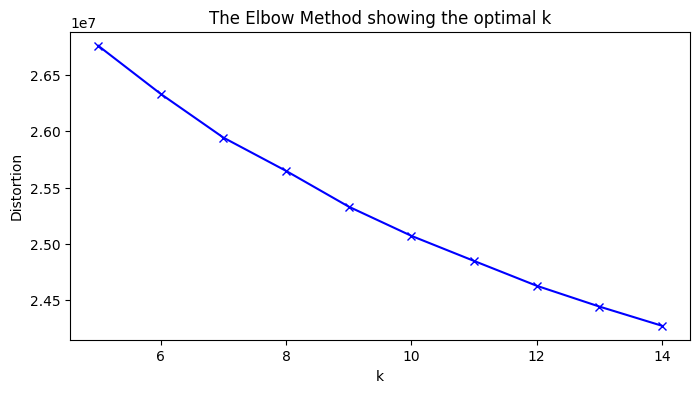

Optimal K: 10


In [ ]:
optimal_k = elbow_method(X_train_scaled)
print(f'Optimal K: {optimal_k}')

## b. 
### Criteria for Defining the Number of Clusters

The number of clusters (K) in the K-means algorithm is determined using the Elbow Method. The criteria behind this method are as follows:

1. **Distortion Calculation:**
    - For each value of K, the K-means algorithm is run, and the distortion (sum of squared distances from each point to its assigned cluster center) is calculated.

2. **Plotting Distortion vs. K:**
    - The distortion values are plotted against the number of clusters (K). This plot helps visualize how the distortion changes with increasing K.

3. **Identifying the Elbow Point:**
    - The "elbow point" in the plot is identified, where the distortion starts to decrease more slowly. This point indicates that increasing K further does not significantly reduce the distortion.

4. **Optimal K Selection:**
    - The optimal number of clusters (K) is chosen at the elbow point, where the plot shows a noticeable bend. This point suggests that the chosen K value balances the trade-off between minimizing distortion and avoiding overfitting.

By following these criteria, the Elbow Method helps in selecting an appropriate number of clusters that best represent the underlying structure of the data.

Now using the optimal **K** we can Cluster our dataset.

In [60]:
# Clustering with optimal K
kmeans = KMeans(n_clusters=optimal_k,random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

Now lets visualise the clustured data.

In [ ]:
# Visualize clusters with subplots
def visualize_clusters(data, clusters, cluster_count, num_examples=5):
    fig, axes = plt.subplots(cluster_count, num_examples, figsize=(num_examples * 2, cluster_count * 2))
    for cluster in range(cluster_count):
        cluster_indices = np.where(clusters == cluster)[0]
        selected_indices = np.random.choice(cluster_indices, num_examples, replace=False)
        for i, idx in enumerate(selected_indices):
            ax = axes[cluster, i]
            ax.imshow(data[idx].reshape(28, 28), cmap='gray')
            ax.set_title(f'Cluster: {cluster + 1}')
            ax.axis('off')
    plt.tight_layout()
    plt.show()

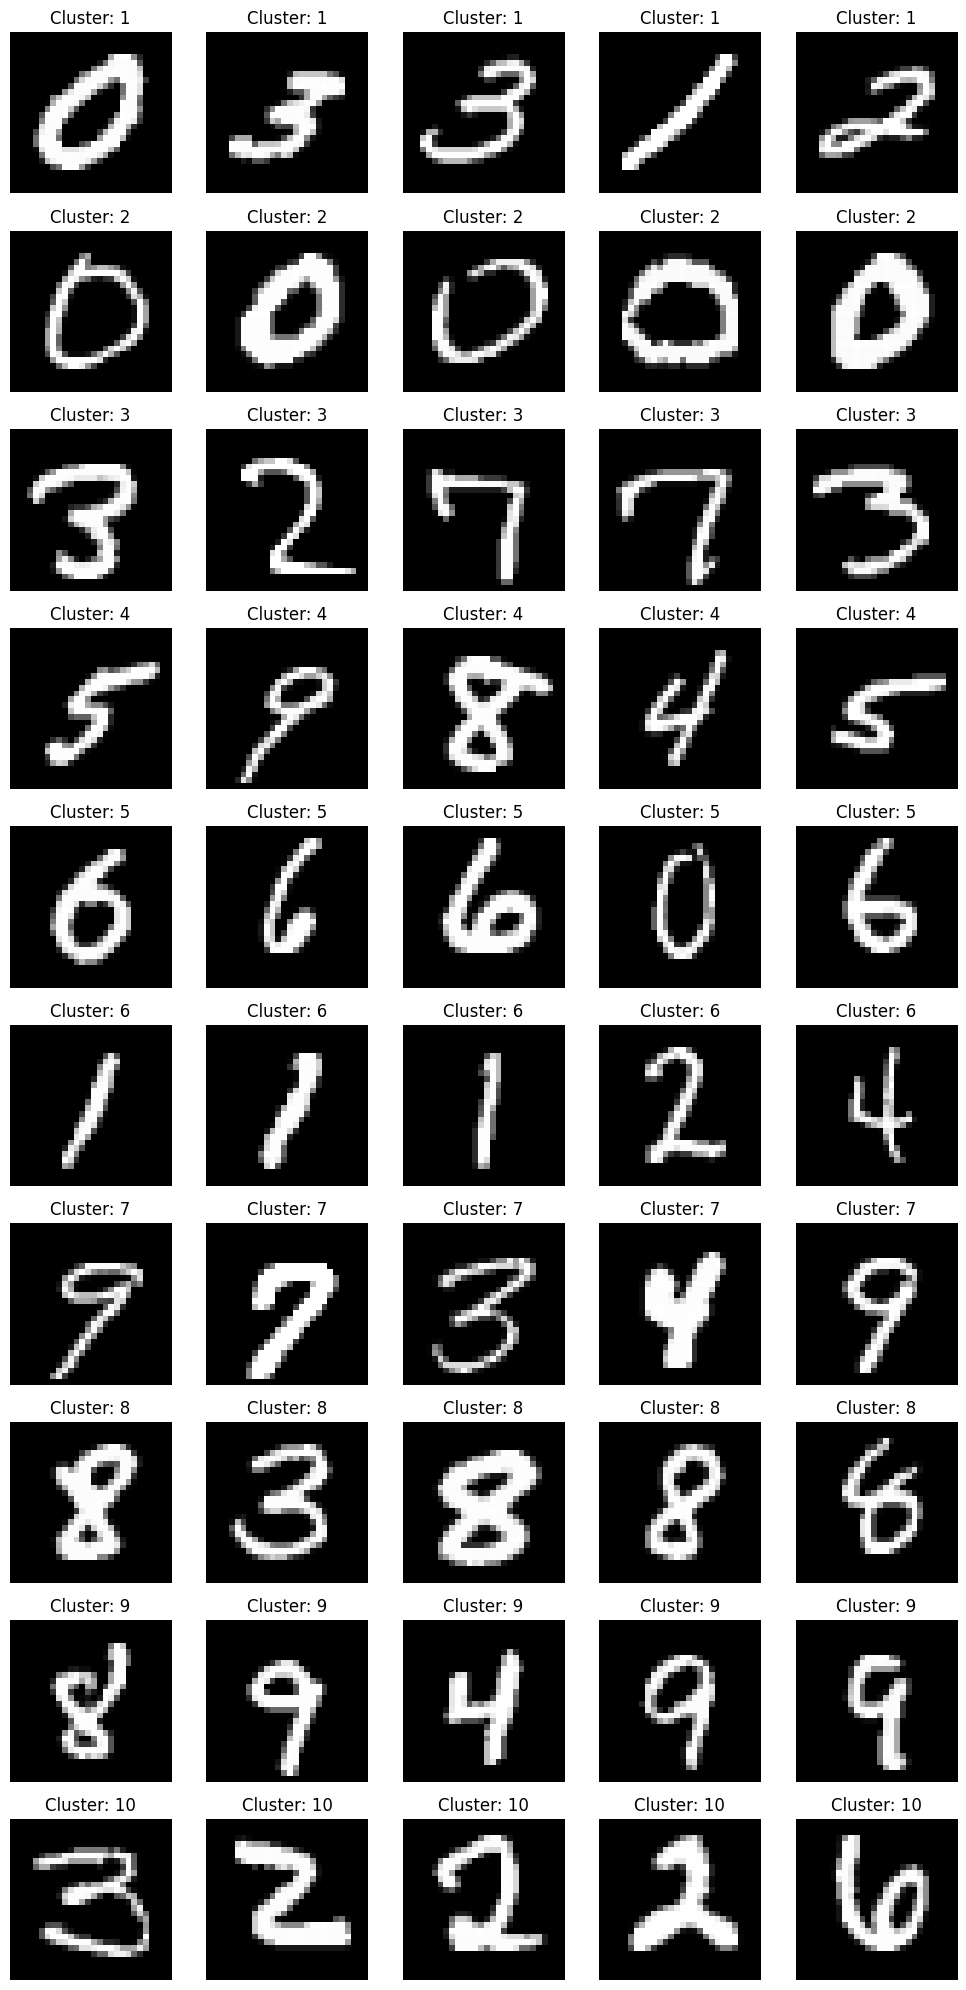

In [ ]:
# Visualize initial clusters
visualize_clusters(X_train, clusters, optimal_k)


## c. 

### Cluster Analysis

1. **Cluster 2:**
    - **Observation:** All images in this cluster are labeled as '0'.
    - **Justification:** This indicates that the K-means algorithm has successfully grouped all '0' digits together, likely due to their distinct circular shape and lack of significant features that could be confused with other digits.

2. **Cluster 5:**
    - **Observation:** Most images in this cluster are labeled as '6', but there is one image labeled as '0'.
    - **Justification:** The digit '6' has a circular shape similar to '0', which can sometimes lead to misclassification. The presence of a '0' in this cluster suggests that the algorithm might have been confused by the similar shapes, especially if the '0' had some noise or was not perfectly circular.

3. **Cluster 8:**
    - **Observation:** Most images in this cluster are labeled as '8', but there is one image labeled as '3'.
    - **Justification:** The digit '8' has two loops, while '3' has two semi-circular shapes stacked on top of each other. The similarity in the structure of these digits can lead to misclassification, especially if the '3' is written in a way that makes the loops appear more closed, resembling an '8'.

### Conclusion

Misclustered images often occur due to the similarity in shapes and features of certain digits. The K-means algorithm relies on distance metrics to group similar data points, and when digits have overlapping features or are written in a way that makes them look similar, misclassification can occur. This is a common challenge in clustering handwritten digits and highlights the importance of using additional techniques, such as more advanced clustering algorithms or incorporating domain-specific knowledge, to improve classification accuracy.


In [ ]:
# Silhouette method to identify optimal K value
def silhouette_method(data):
    silhouette_scores = []
    K = range(5, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        clusters = kmeans.fit_predict(data)
        score = silhouette_score(data, clusters)
        silhouette_scores.append(score)
    plt.figure(figsize=(8, 4))
    plt.plot(K, silhouette_scores, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title('The Silhouette Method showing the optimal k')
    plt.show()
    optimal_k_silhouette = K[silhouette_scores.index(max(silhouette_scores))]
    return optimal_k_silhouette

## a.
### Silhouette Method for Finding Optimal K

The silhouette method is used to determine the optimal number of clusters (K) in a K-means clustering algorithm. It involves the following steps:

1. **Initialize Variables:**
    - `silhouette_scores = []`: An empty list to store the silhouette scores for each K.
    - `K = range(5, 11)`: A range of K values to test, from 5 to 10.

2. **Run K-means for Each K:**
    - For each value of K in the specified range, the K-means algorithm is run with `n_clusters=k`.
    - `kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)`: Initializes the K-means algorithm with the specified number of clusters and a random state for reproducibility.
    - `clusters = kmeans.fit_predict(data)`: Fits the K-means algorithm to the data and predicts the cluster for each data point.
    - `score = silhouette_score(data, clusters)`: Calculates the silhouette score for the clustering. The silhouette score measures how similar a data point is to its own cluster compared to other clusters.

3. **Store Silhouette Scores:**
    - `silhouette_scores.append(score)`: Appends the silhouette score to the silhouette_scores list.

4. **Plot Silhouette Scores:**
    - A plot is created with the number of clusters (K) on the x-axis and the silhouette scores on the y-axis. The plot helps visualize the silhouette scores for different values of K.

5. **Determine Optimal K:**
    - `optimal_k_silhouette = K[silhouette_scores.index(max(silhouette_scores))]`: Finds the index of the maximum silhouette score and retrieves the corresponding K value.
    - `return optimal_k_silhouette`: Returns the optimal K value.

The optimal K is the one that maximizes the silhouette score, indicating that the clusters are well-separated and cohesive.

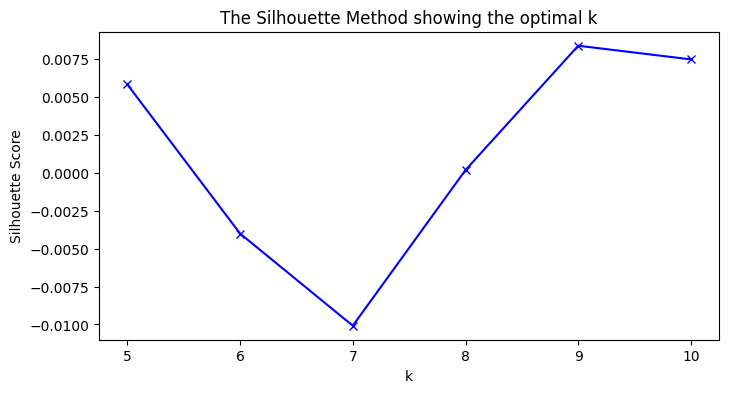

Optimal K (Silhouette): 9


In [ ]:
optimal_k_silhouette = silhouette_method(X_train_scaled)
print(f'Optimal K (Silhouette): {optimal_k_silhouette}')

## b. 
### Criteria for Defining the Number of Clusters

The number of clusters (K) in the K-means algorithm is determined using the Silhouette Method. The criteria behind this method are as follows:

1. **Silhouette Score Calculation:**
    - For each value of K, the K-means algorithm is run, and the silhouette score is calculated. The silhouette score measures how similar a data point is to its own cluster compared to other clusters.

2. **Plotting Silhouette Scores vs. K:**
    - The silhouette scores are plotted against the number of clusters (K). This plot helps visualize how the silhouette scores change with increasing K.

3. **Identifying the Optimal K:**
    - The optimal number of clusters (K) is chosen as the one that maximizes the silhouette score. This indicates that the clusters are well-separated and cohesive.

By following these criteria, the Silhouette Method helps in selecting an appropriate number of clusters that best represent the underlying structure of the data.


In [ ]:
# Clustering with optimal K from silhouette method
kmeans_silhouette = KMeans(n_clusters=optimal_k_silhouette)
clusters_silhouette = kmeans_silhouette.fit_predict(X_train_scaled)

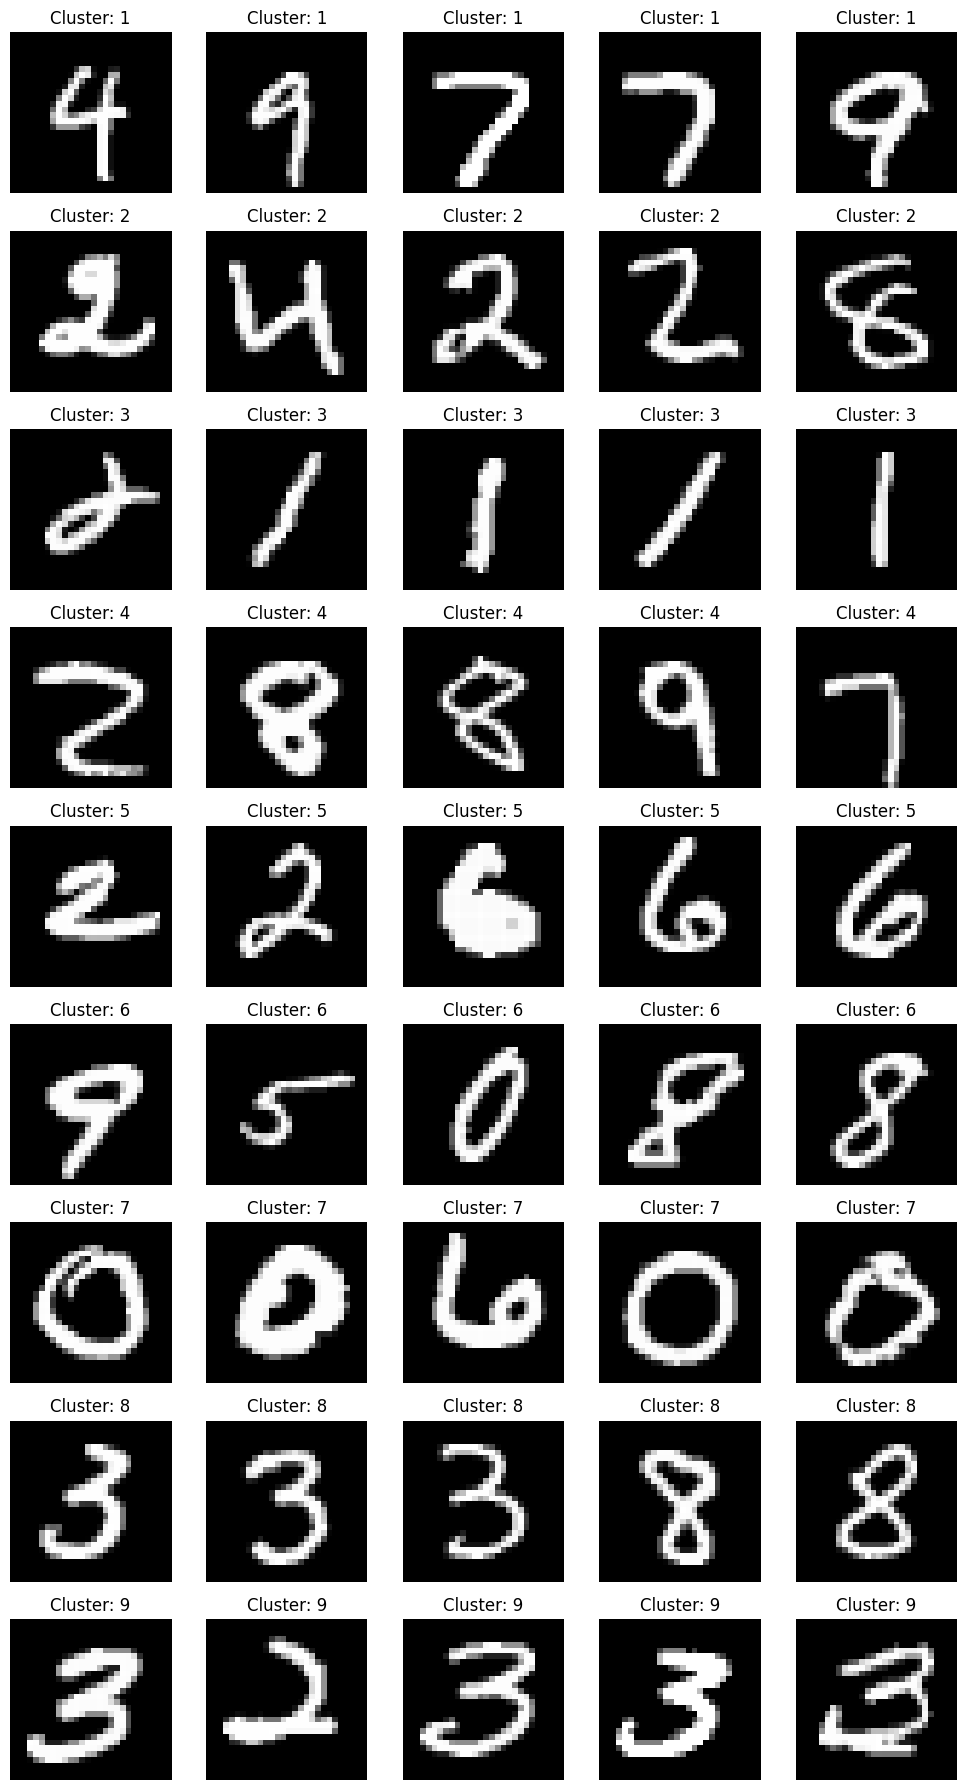

In [ ]:
# Visualize clusters after silhouette method
visualize_clusters(X_train, clusters_silhouette, optimal_k_silhouette)

## c.
### Cluster Analysis

1. **Cluster 7:**
    - **Observation:** This cluster contains images labeled as '6' and '0'.
    - **Justification:** The digit '6' has a circular shape similar to '0', which can sometimes lead to misclassification. The presence of both '6' and '0' in this cluster suggests that the algorithm might have been confused by the similar shapes, especially if the '6' is written in a way that makes the loop appear more closed, resembling a '0'.

2. **Cluster 9:**
    - **Observation:** This cluster contains images labeled as '3' and '2'.
    - **Justification:** The digit '3' has two semi-circular shapes stacked on top of each other, while '2' has a loop and a tail. The similarity in the structure of these digits can lead to misclassification, especially if the '3' is written in a way that makes the loops appear more closed, resembling a '2'.

### Conclusion

Misclustered images often occur due to the similarity in shapes and features of certain digits. The K-means algorithm relies on distance metrics to group similar data points, and when digits have overlapping features or are written in a way that makes them look similar, misclassification can occur. This is a common challenge in clustering handwritten digits and highlights the importance of using additional techniques, such as more advanced clustering algorithms or incorporating domain-specific knowledge, to improve classification accuracy.

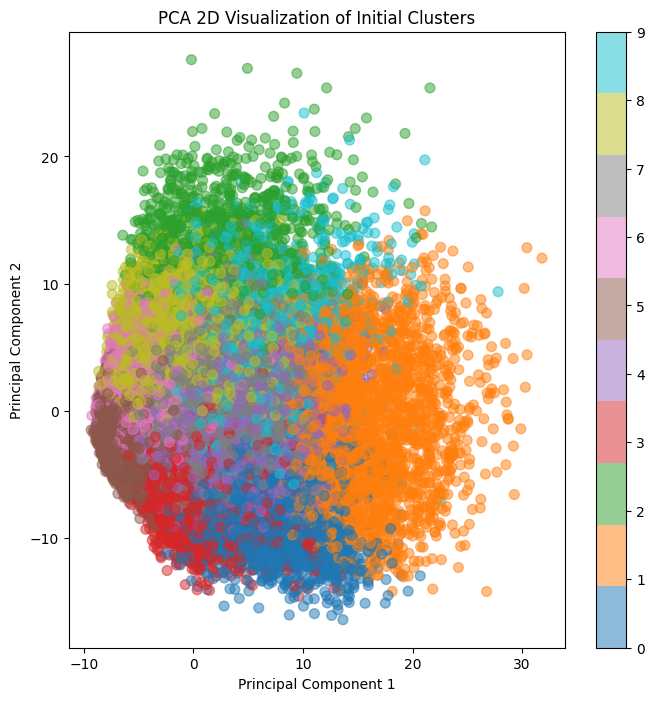

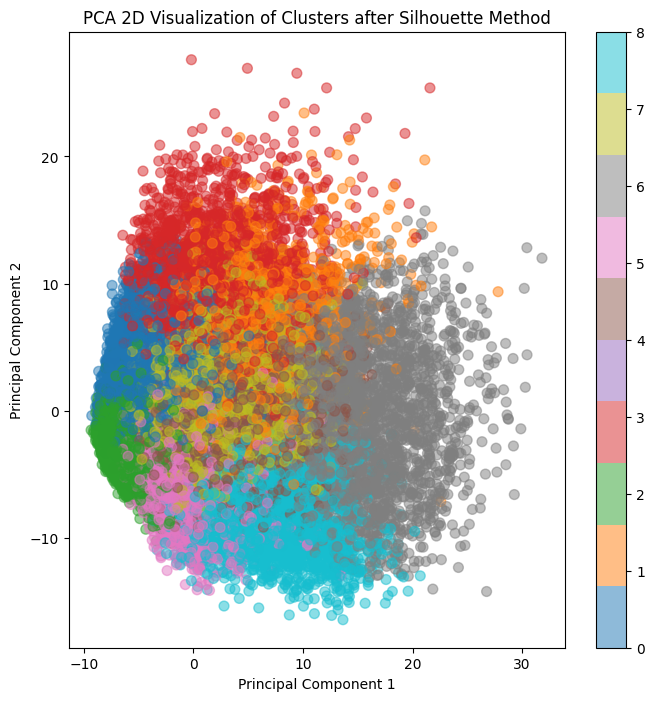

In [61]:
# PCA for 2D visualization
def pca_2d_visualization(data, clusters, title='PCA 2D Visualization'):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    plt.figure(figsize=(8, 8))
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='tab10', s=50, alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Visualize initial clusters in 2D
pca_2d_visualization(X_train_scaled, clusters, title='PCA 2D Visualization of Initial Clusters')

# Visualize clusters after silhouette method in 2D
pca_2d_visualization(X_train_scaled, clusters_silhouette, title='PCA 2D Visualization of Clusters after Silhouette Method')


## d. 
### Ways to Reduce Cluster Errors

1. **Feature Engineering:**
    - **Extract More Features:** Use techniques like edge detection and texture analysis.
    - **Dimensionality Reduction:** Apply PCA or t-SNE to reduce data dimensions.

2. **Advanced Clustering Algorithms:**
    - **GMM:** Models clusters with different shapes and sizes.
    - **DBSCAN:** Finds clusters of any shape and handles noise.
    - **Agglomerative Clustering:** Builds nested clusters.


3. **Data Preprocessing:**
    - **Normalization:** Ensure data is normalized.
    - **Handle Missing Values:** Impute or remove missing values.

4. **Ensemble Clustering:**
    - Combine multiple clustering algorithms for better results.

5. **Post-Processing:**
    - **Cluster Refinement:** Reassign points near cluster boundaries.
    - **Outlier Detection:** Remove outliers using techniques like Isolation Forest.


## 2. Using Artificial neural network and convolutional neural network Identify the different classes of MNIST Fashion dataset.

In [2]:
# Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load datasets
train_data = pd.read_csv('fashion_mnist/fashion_mnist_train.csv')
test_data = pd.read_csv('fashion_mnist/fashion_mnist_test.csv')

# Preprocess data
X_train = train_data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_test = test_data.iloc[:, 0].values

In [65]:
# Visualize data
def visualize_data(X, y):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(y[i])
    plt.show()

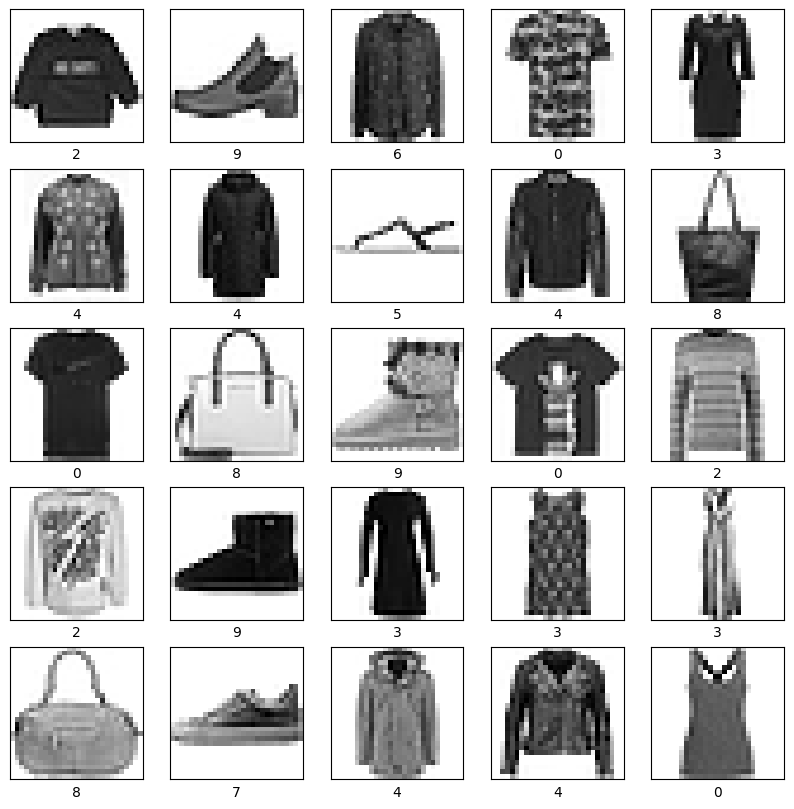

In [66]:
visualize_data(X_train, y_train)

## a. Initially  train  a  classifier  using  artificial  neural  network  while  treating pixels as different features 

In [3]:
# ANN Model
ann_model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [82]:
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, y_train, epochs=20)
ann_model.save('ANN_model.h5')

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9119 - loss: 0.2367
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9165 - loss: 0.2285
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9197 - loss: 0.2154
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9198 - loss: 0.2121
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9201 - loss: 0.2106
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9246 - loss: 0.1999
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9259 - loss: 0.1958
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9275 - loss: 0.1922
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9294 - loss: 0.1888
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9321 - loss: 0.1789
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9347 - loss: 0.1732
Epoch 12/20
1875/1875 ━━━━━━━━

In [3]:
# Load the saved ANN model
loaded_ann_model = tf.keras.models.load_model('ANN_model.h5')

I0000 00:00:1739154155.480044    4498 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4273 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:
# Visualize classified images
def visualize_classified_images(model, X, y):
    predictions = model.predict(X)
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(f"True: {y[i]}, Pred: {np.argmax(predictions[i])}")
    plt.show()

I0000 00:00:1739154163.859639    4750 service.cc:148] XLA service 0x713484003e60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739154163.859774    4750 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-02-10 07:52:43.867518: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739154163.882761    4750 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-10 07:52:44.091087: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1739154164.279422    4750 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


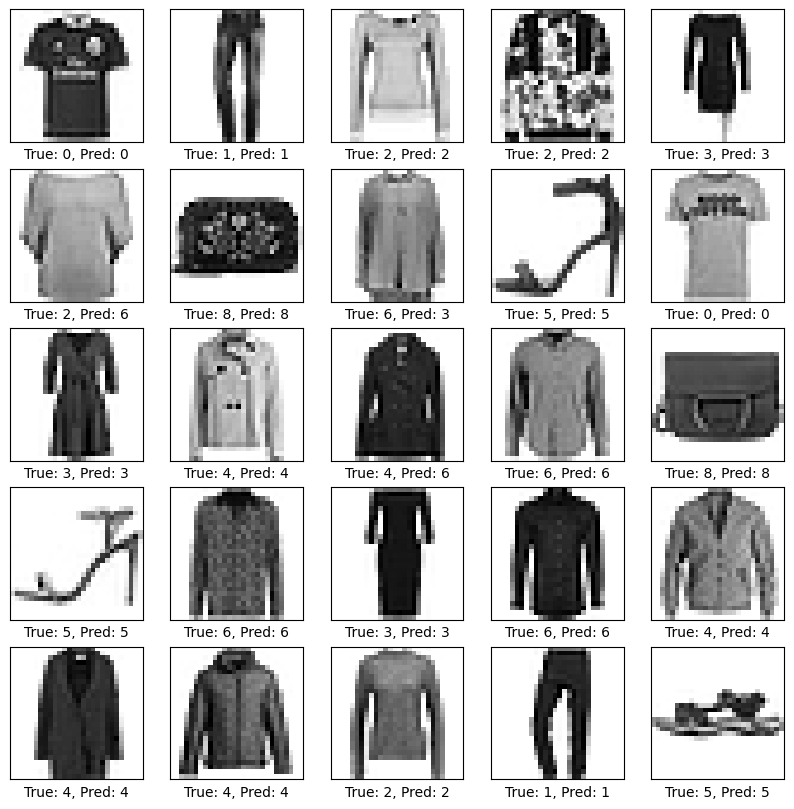

In [5]:
# Visualize classified images using the loaded model
visualize_classified_images(loaded_ann_model, X_test, y_test)

## b. Train  a  Convolutional  neural  network(CNN)  for  the  above  data  set considering data points as images. 

In [9]:
# CNN Model with further increased kernel size
cnn_model = Sequential([
    Conv2D(64, (9, 9), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (9, 9), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/home/ravindu/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=15)
cnn_model.save('CNN_model.h5')

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7692 - loss: 0.6349
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8803 - loss: 0.3254
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8997 - loss: 0.2725
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9117 - loss: 0.2367
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9186 - loss: 0.2159
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9276 - loss: 0.1939
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9340 - loss: 0.1765
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9409 - loss: 0.1553
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9464 - loss: 0.1395
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9524 - loss: 0.1257
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9560 - loss: 0.1161
Epoch 12/15
1875/1875 ━━━━━━━━

In [7]:
# Load the saved CNN model
loaded_cnn_model = tf.keras.models.load_model('CNN_model.h5')

I0000 00:00:1739441011.085262    4402 service.cc:148] XLA service 0x7acfd80046f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739441011.085490    4402 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-02-13 15:33:31.095003: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739441011.117771    4402 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-13 15:33:31.326076: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47', 4 bytes spill stores, 4 bytes spill loads



174/313 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step

I0000 00:00:1739441011.803196    4402 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


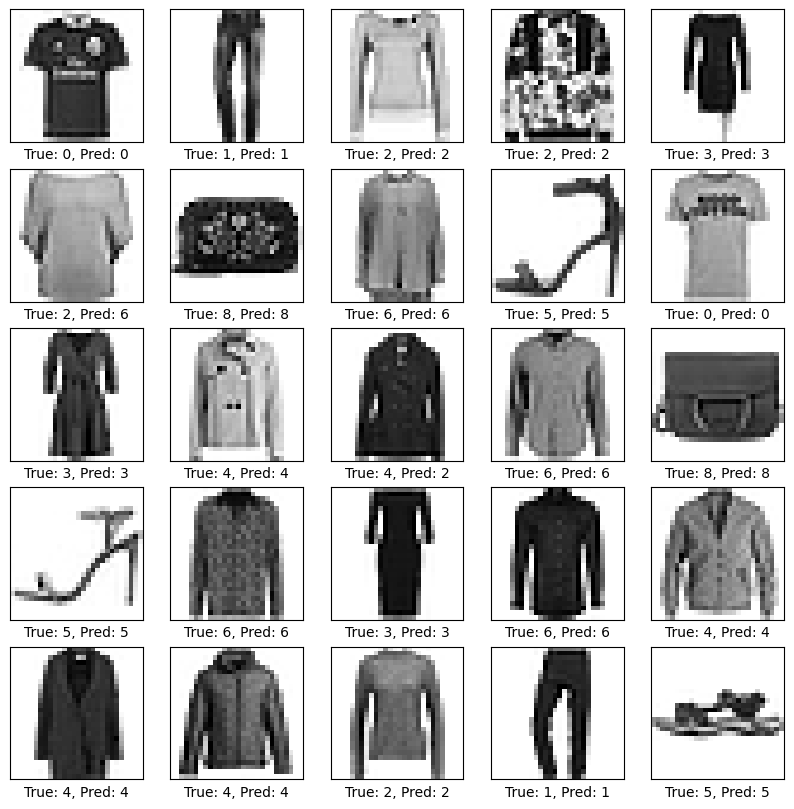

In [8]:
# Visualize classified images using the loaded CNN model
visualize_classified_images(loaded_cnn_model, X_test, y_test)

## c. Identify the difference between above 2 models

In [9]:
# Visualize CNN layer kernels
def visualize_cnn_kernels(model, layer_index):
    layer = model.layers[layer_index]
    if 'conv' not in layer.name:
        print(f"Layer {layer_index} is not a convolutional layer.")
        return
    
    kernels, biases = layer.get_weights()
    n_kernels = kernels.shape[-1]
    
    plt.figure(figsize=(10, 10))
    for i in range(min(n_kernels, 64)):  # Visualize up to 64 kernels
        plt.subplot(8, 8, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(kernels[:, :, 0, i], cmap='gray')
            #blasck and white   
        plt.xlabel(f'Kernel {i}')
    plt.show()

### Artificial Neural Network (ANN)
1. **Architecture:**
    - Consists of fully connected layers.
    - Treats each pixel as an independent feature.
    - Does not consider spatial relationships between pixels.

2. **Advantages:**
    - Simpler architecture and faster to train.
    - Suitable for smaller datasets or simpler tasks.

3. **Disadvantages:**
    - Ignores spatial hierarchies in images.
    - Less effective for complex image recognition tasks.

### Convolutional Neural Network (CNN)
1. **Architecture:**
    - Consists of convolutional layers, pooling layers,(feature extraction) and fully connected layers(classification).
    - Uses convolutional layers to capture spatial hierarchies and local patterns.
    - Pooling layers reduce dimensionality and retain important features.

2. **Advantages:**
    - Captures spatial relationships and hierarchies in images.
    - More effective for complex image recognition tasks.
    - Better performance on large datasets with high-dimensional data.

3. **Disadvantages:**
    - More complex architecture and longer training time.
    - Requires more computational resources.

### Conclusion
- **ANN** is simpler and faster but less effective for image recognition tasks due to its inability to capture spatial relationships.
- **CNN** is more powerful for image recognition tasks as it captures spatial hierarchies and local patterns, leading to better performance on complex datasets.

## d. Visualize the different layers in the CNN and identify different patterns recognized in each layer of the network.

Visualizing kernels of layer 0 (conv2d_28)


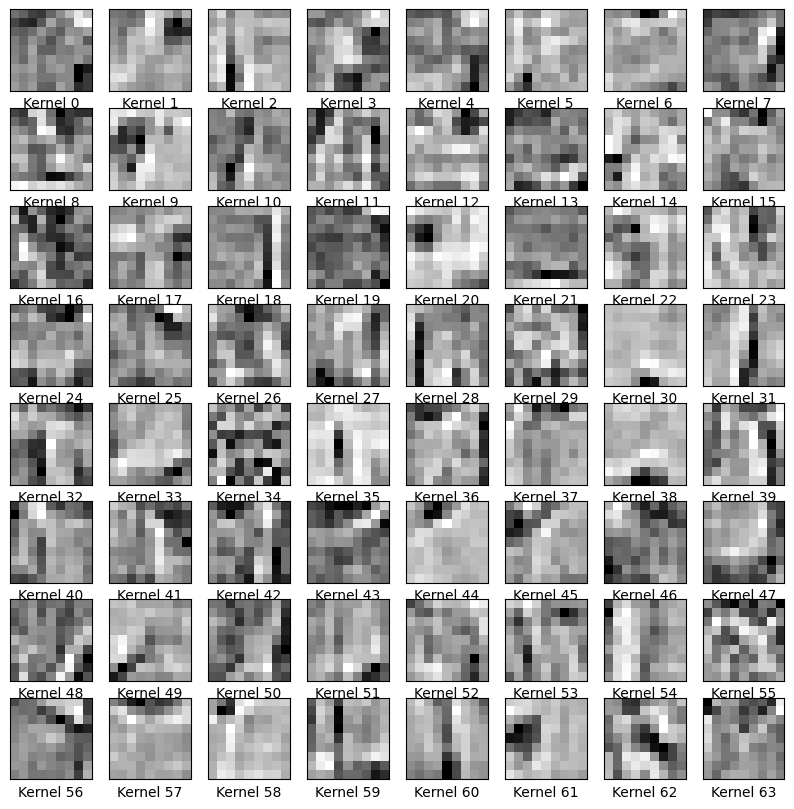

Visualizing kernels of layer 2 (conv2d_29)


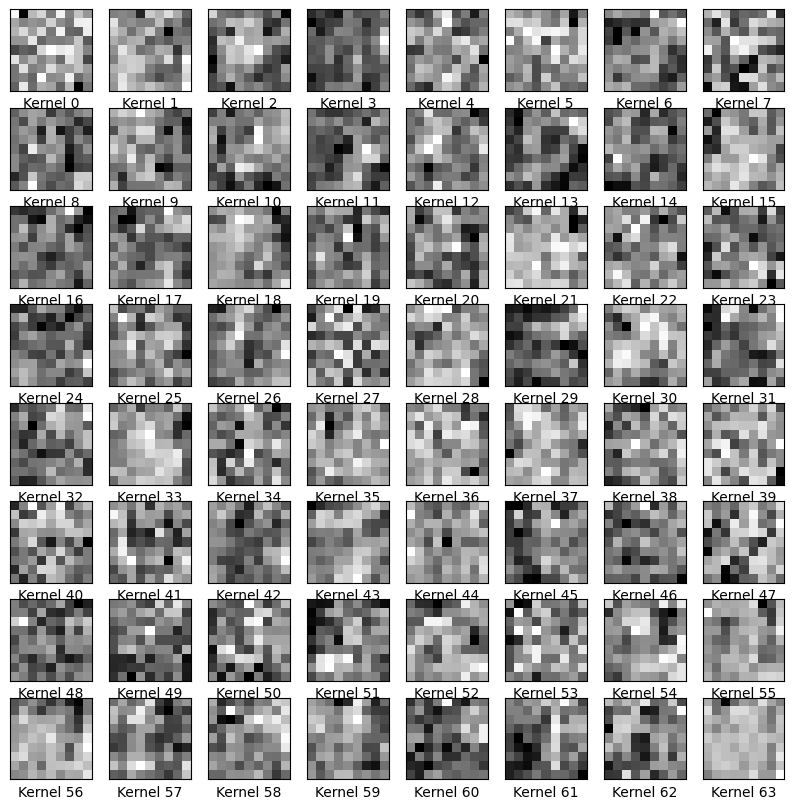

In [10]:
# Visualize kernels of intermediate layers
def visualize_intermediate_kernels(model):
    for i, layer in enumerate(model.layers):
        if 'conv' in layer.name:
            print(f"Visualizing kernels of layer {i} ({layer.name})")
            visualize_cnn_kernels(model, i)

# Example usage: Visualize kernels of all convolutional layers
visualize_intermediate_kernels(loaded_cnn_model)

## d. Visualize the different layers in the CNN and identify different patterns recognized in each layer of the network. 

### Layer 1: 9x9 Convolution
- **Recognition:** Detects basic features like edges and simple lines.
- **Example:** Many filters highlight vertical, horizontal, or diagonal edges.

### Layer 2: 9x9 Convolution
- **Recognition:** Combines basic features to capture curves and textures.
- **Example:** Filters show more composite patterns and corners.

### Summary
- **Layer 1:** Extracts low-level features.
- **Layer 2:** Builds on Layer 1 to identify complex patterns.


### e. Identify the Change of Complexity of the Patterns Recognized by Layers with the Depth of the Network

As we move deeper into the layers of a Convolutional Neural Network (CNN), the complexity of the patterns recognized by the layers increases. 

1. **Initial Layers (Shallow Layers):**
    - **Recognition:** Detect basic features such as edges and lines.

2. **Intermediate Layers:**
    - **Recognition:** Combine basic features to form more complex patterns like corners and curves.

3. **Deeper Layers:**
    - **Recognition:** Capture high-level features and complex patterns representing parts of objects or entire objects.

4. **Final Layers:**
    - **Recognition:** Aggregate all the learned features to make final predictions.


This hierarchical feature extraction allows CNNs to effectively recognize and classify complex images by progressively building up from simple to complex patterns.


## f. Discuss having more or less nodes in a single layer and having a deep or a shallow network against the computational complexity
### Number of Nodes
**More Nodes:**
- **Advantages:**
    - Can capture more complex patterns.
    - Increases model capacity.
- **Disadvantages:**
    - Higher computational cost.
    - Risk of overfitting.

**Less Nodes:**
- **Advantages:**
    - Lower computational cost.
    - Reduces overfitting risk.
- **Disadvantages:**
    - May miss complex patterns.
    - Lower model capacity.

### Network Depth

**Deep Network:**
- **Advantages:**
    - Can learn hierarchical features.
    - Better for complex tasks.
- **Disadvantages:**
    - Higher computational cost.
    - Harder to train (vanishing/exploding gradients).

**Shallow Network:**
- **Advantages:**
    - Easier to train.
    - Lower computational cost.
- **Disadvantages:**
    - Limited capacity for complex tasks.
    - May not capture hierarchical features.

## g. Discuss about the way you defined the optimum neural network architecture for the above problem. 

1. **Artificial Neural Network (ANN):**
    - **Architecture:**
        - Input Layer: Flattened 28x28 pixels.
        - Hidden Layer: 128 neurons with ReLU activation.
        - Output Layer: 10 neurons with softmax activation.
    - **Reasoning:**
        - Simple architecture suitable for initial classification tasks.
        - Efficient for smaller datasets and less complex patterns.

2. **Convolutional Neural Network (CNN):**
    - **Architecture:**
        - Convolutional Layers: Two layers with 64 and 128 filters, 9x9 kernel size, ReLU activation.
        - Pooling Layers: MaxPooling with 2x2 pool size.
        - Fully Connected Layers: 128 neurons with ReLU activation.
        - Output Layer: 10 neurons with softmax activation.
    - **Reasoning:**
        - Captures spatial hierarchies and local patterns.
        - Suitable for complex image recognition tasks.
        - Increased kernel size to capture more detailed features.